# Modes of Variability

This notebook provides an overview of running the modes of variability module. More information can be found in the [README](https://github.com/PCMDI/pcmdi_metrics/tree/master/pcmdi_metrics/variability_mode). Example parameter files are located in the [PMP sample setups](https://github.com/PCMDI/pcmdi_metrics/tree/master/sample_setups/pcmdi_parameter_files/variability_modes). 

It is expected that the user has run the Demo_0_download_data notebook to obtain the sample data and generate parameter files. This first cell loads the demo directory choices made in Demo_0_download_data.

In [1]:
from user_choices import demo_data_directory, demo_output_directory

## Environment

The modes of variability metric requires two additional packages that are not part of the standard PMP install: [eofs](https://ajdawson.github.io/eofs/latest/) and [scipy](https://www.scipy.org/). If those are not already part of your environment, you can edit the following cell to install them in the jupyter notebook kernel. Delete the triple quotations from lines 2&5 to install with conda:

In [2]:
# for conda
"""
import sys
!conda install --yes --prefix {sys.prefix} -c conda-forge eofs scipy
"""

'\nimport sys\n!conda install --yes --prefix {sys.prefix} -c conda-forge eofs scipy\n'

OR delete the triple quotations on lines 2&5 from this cell to install with pip:

In [3]:
# for pip
"""
import sys
!{sys.executable} -m pip install eofs scipy
"""

'\nimport sys\n!{sys.executable} -m pip install eofs scipy\n'

## Usage

Modes of variability can be run on the command line or with using a parameter file

Available modes: NAM, NAO, SAM, PNA, PDO  
Available seasons: DJF, MAM, JJA, SON, monthly, yearly  
ConvEOF = True  # Calculate conventioanl EOF for model  
CBF = True  # Calculate Common Basis Function (CBF) for model  

For help, type:  
```
variability_modes_driver.py --help
```

In [4]:
%%bash
variability_modes_driver.py --help

usage: variability_modes_driver.py [-h] [--parameters PARAMETERS]
                                   [--diags OTHER_PARAMETERS [OTHER_PARAMETERS ...]]
                                   [--results_dir RESULTS_DIR]
                                   [--reference_data_path REFERENCE_DATA_PATH]
                                   [--modpath MODPATH] [--mip MIP] [--exp EXP]
                                   [--frequency FREQUENCY] [--realm REALM]
                                   [--reference_data_name REFERENCE_DATA_NAME]
                                   [-v VARIABILITY_MODE]
                                   [--seasons SEASONS [SEASONS ...]]
                                   [--modnames MODNAMES [MODNAMES ...]]
                                   [-r REALIZATION] [--modpath_lf MODPATH_LF]
                                   [--varOBS VAROBS] [--varModel VARMODEL]
                                   [--eofn_obs EOFN_OBS] [--eofn_mod EOFN_MOD]
                                   [--osyear

## Basic example

This example uses settings from the "basic_mov_param.py" parameter file to run the metrics for the NAM (Northern Annular Mode) in DJF. The input data for this mode of variability is monthly sea level pressure. 

In [5]:
%%bash
variability_modes_driver.py -p basic_mov_param.py --case_id "mov_1"

mip: cmip5
exp: historical
fq: mo
realm: atm
EofScaling: False
RmDomainMean: True
LandMask: False
nc_out_obs, plot_obs: True True
nc_out_model, plot_model: True True
CMEC:False
mode: NAM
seasons: ['DJF']
models: ['ACCESS1-0']
number of models: 1
realization:  r1i1p1
parallel: False
demo_output/mov_1
demo_output/mov_1
demo_output/mov_1
 -----  ACCESS1-0  ---------------------
 ---  r1i1p1  ---


/opt/anaconda3/envs/pcmdi_metrics_dev/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/opt/anaconda3/envs/pcmdi_metrics_dev/lib/python3.9/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/opt/anaconda3/envs/pcmdi_metrics_dev/lib/python3.9/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/opt/anaconda3/envs/pcmdi_me

## Observation Settings

Options given in the `basic_mov_param.py` file can be overriden by options given from the command line.

For example, below is for settings for observations from `basic_mov_param.py`:
```python
varOBS = 'psl'  
ObsUnitsAdjust = (True, 'divide', 100.0)  # Pa to hPa; or (False, 0, 0)  

osyear = 1900  
oeyear = 2005  
eofn_obs = 1  
```

If you want to adjust observation starting year (`osyear`) to 1980 and assign new `case_id` as "mov_2":

In [6]:
%%bash
variability_modes_driver.py -p basic_mov_param.py --case_id "mov_2" --osyear 1980

mip: cmip5
exp: historical
fq: mo
realm: atm
EofScaling: False
RmDomainMean: True
LandMask: False
nc_out_obs, plot_obs: True True
nc_out_model, plot_model: True True
CMEC:False
mode: NAM
seasons: ['DJF']
models: ['ACCESS1-0']
number of models: 1
realization:  r1i1p1
parallel: False
demo_output/mov_2
demo_output/mov_2
demo_output/mov_2
 -----  ACCESS1-0  ---------------------
 ---  r1i1p1  ---


/opt/anaconda3/envs/pcmdi_metrics_dev/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/opt/anaconda3/envs/pcmdi_metrics_dev/lib/python3.9/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/opt/anaconda3/envs/pcmdi_metrics_dev/lib/python3.9/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/opt/anaconda3/envs/pcmdi_me

## Model Settings

Similarly, options for models can be also adjusted from command line.

In [7]:
%%bash
variability_modes_driver.py -p basic_mov_param.py --case_id "mov_3" --msyear 1950 --meyear 2005

mip: cmip5
exp: historical
fq: mo
realm: atm
EofScaling: False
RmDomainMean: True
LandMask: False
nc_out_obs, plot_obs: True True
nc_out_model, plot_model: True True
CMEC:False
mode: NAM
seasons: ['DJF']
models: ['ACCESS1-0']
number of models: 1
realization:  r1i1p1
parallel: False
demo_output/mov_3
demo_output/mov_3
demo_output/mov_3
 -----  ACCESS1-0  ---------------------
 ---  r1i1p1  ---


/opt/anaconda3/envs/pcmdi_metrics_dev/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/opt/anaconda3/envs/pcmdi_metrics_dev/lib/python3.9/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/opt/anaconda3/envs/pcmdi_metrics_dev/lib/python3.9/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/opt/anaconda3/envs/pcmdi_me

## Results

Results are generated in three different types: maps in image (PNG), maps and time series in binary (netCDF), and metrics in text (JSON).

By the default setting, metrics code generates outputs for CBF (Common Basis Function), EOF1, EOF2, and EOF3. 

### Graphics (PNG)

Graphics are saved in along with other results in a folder with the case_id name. Here we list the images available from the Basic Example and display the CBF plot.

In [8]:
!ls {demo_output_directory + "/mov_1/*.png"}

demo_output/mov_1/NAM_psl_EOF1_DJF_cmip5_ACCESS1-0_historical_r1i1p1_mo_atm_1900-2005.png
demo_output/mov_1/NAM_psl_EOF1_DJF_cmip5_ACCESS1-0_historical_r1i1p1_mo_atm_1900-2005_cbf.png
demo_output/mov_1/NAM_psl_EOF1_DJF_cmip5_ACCESS1-0_historical_r1i1p1_mo_atm_1900-2005_cbf_teleconnection.png
demo_output/mov_1/NAM_psl_EOF1_DJF_cmip5_ACCESS1-0_historical_r1i1p1_mo_atm_1900-2005_teleconnection.png
demo_output/mov_1/NAM_psl_EOF1_DJF_obs_1900-2005.png
demo_output/mov_1/NAM_psl_EOF1_DJF_obs_1900-2005_teleconnection.png
demo_output/mov_1/NAM_psl_EOF2_DJF_cmip5_ACCESS1-0_historical_r1i1p1_mo_atm_1900-2005.png
demo_output/mov_1/NAM_psl_EOF2_DJF_cmip5_ACCESS1-0_historical_r1i1p1_mo_atm_1900-2005_teleconnection.png
demo_output/mov_1/NAM_psl_EOF3_DJF_cmip5_ACCESS1-0_historical_r1i1p1_mo_atm_1900-2005.png
demo_output/mov_1/NAM_psl_EOF3_DJF_cmip5_ACCESS1-0_historical_r1i1p1_mo_atm_1900-2005_teleconnection.png


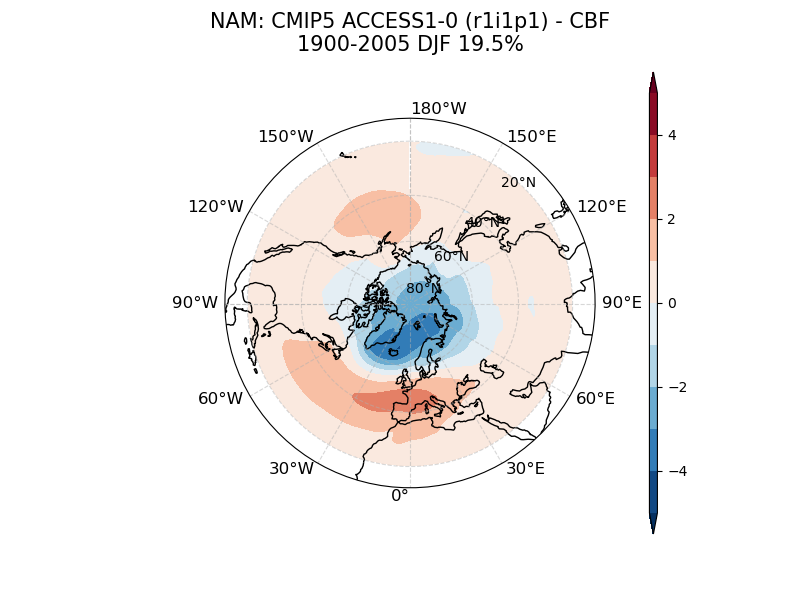

In [9]:
# open and display one of the graphics

from IPython.display import Image
from IPython.core.display import HTML 

Image(filename = demo_output_directory + "/mov_1/NAM_psl_EOF1_DJF_cmip5_ACCESS1-0_historical_r1i1p1_mo_atm_1900-2005_cbf.png")

### Binary (NetCDF)

NetCDF files include spatial patterns for aforementioned maps and associated PC timeseries. The ncdump utility is used to get a summary of the netCDF results from the Basic Example.

In [10]:
!ls {demo_output_directory + "/mov_1/*.nc"}

demo_output/mov_1/NAM_psl_EOF1_DJF_cmip5_ACCESS1-0_historical_r1i1p1_mo_atm_1900-2005.nc
demo_output/mov_1/NAM_psl_EOF1_DJF_cmip5_ACCESS1-0_historical_r1i1p1_mo_atm_1900-2005_cbf.nc
demo_output/mov_1/NAM_psl_EOF1_DJF_obs_1900-2005.nc
demo_output/mov_1/NAM_psl_EOF2_DJF_cmip5_ACCESS1-0_historical_r1i1p1_mo_atm_1900-2005.nc
demo_output/mov_1/NAM_psl_EOF3_DJF_cmip5_ACCESS1-0_historical_r1i1p1_mo_atm_1900-2005.nc


In [11]:
!ncdump -h {demo_output_directory + "/mov_1/NAM_psl_EOF1_DJF_cmip5_ACCESS1-0_historical_r1i1p1_mo_atm_1900-2005_cbf.nc"}

netcdf NAM_psl_EOF1_DJF_cmip5_ACCESS1-0_historical_r1i1p1_mo_atm_1900-2005_cbf {
dimensions:
	time = UNLIMITED ; // (105 currently)
	bound = 2 ;
	lat = 145 ;
	lon = 192 ;
variables:
	double time(time) ;
		time:bounds = "bounds_time" ;
		time:axis = "T" ;
		time:calendar = "proleptic_gregorian" ;
		time:units = "days since 0001-01-01" ;
		time:realtopology = "linear" ;
	double bounds_time(time, bound) ;
	double pc(time) ;
		pc:long_name = "variable_18972_pseudo_pcs" ;
		pc:missing_value = 1.e+20 ;
		pc:_FillValue = 1.e+20 ;
	double lat(lat) ;
		lat:bounds = "lat_bnds" ;
		lat:axis = "Y" ;
		lat:units = "degrees_north" ;
		lat:long_name = "latitude" ;
		lat:standard_name = "latitude" ;
		lat:realtopology = "linear" ;
	double lat_bnds(lat, bound) ;
	double lon(lon) ;
		lon:bounds = "lon_bnds" ;
		lon:axis = "X" ;
		lon:modulo = 360. ;
		lon:topology = "circular" ;
		lon:units = "degrees_east" ;
		lon:long_name = "longitude" ;
		lon:standard_name = "longitude" ;
		lon:realtopology = "circu

### Metrics (JSON)

Finally, we list the JSON metrics files from the Basic Example and look inside one of these JSONS.

In [12]:
!ls {demo_output_directory + "/mov_1/*.json"}

demo_output/mov_1/var_mode_NAM_EOF1_stat_cmip5_historical_mo_atm_ACCESS1-0_r1i1p1_1900-2005.json


In [13]:
import json
with open(demo_output_directory+"/mov_1/var_mode_NAM_EOF1_stat_cmip5_historical_mo_atm_ACCESS1-0_r1i1p1_1900-2005.json") as fj:
    metrics = json.load(fj)["RESULTS"]
print(json.dumps(metrics, indent=2))

{
  "ACCESS1-0": {
    "r1i1p1": {
      "defaultReference": {
        "NAM": {
          "DJF": {
            "best_matching_model_eofs__cor": 1,
            "best_matching_model_eofs__rms": 1,
            "best_matching_model_eofs__tcor_cbf_vs_eof_pc": 1,
            "cbf": {
              "bias": -0.00019562846900545848,
              "bias_glo": -0.0429580417876219,
              "cor": 0.9710135582327004,
              "cor_glo": 0.9569263431175612,
              "frac": 0.19537628387451722,
              "frac_cbf_regrid": 0.19658542218267344,
              "mean": -2.1091508603253944e-17,
              "mean_glo": 0.07534158696354626,
              "rms": 0.4650137063764216,
              "rms_glo": 0.2984561498091533,
              "rmsc": 0.24077558921304573,
              "rmsc_glo": 0.29350862004474615,
              "stdv_pc": 1.1646807200025886,
              "stdv_pc_ratio_to_obs": 0.7608321251796004
            },
            "eof1": {
              "bias": -0.0002330214